# Student Mental Health – Depression Prediction Project

## **1. Project Overview**
In this 15-day sprint, we developed machine learning models to predict **depression risk among students** using demographic, academic, and mental health survey data.  
The objective was to build a **data-driven decision-support tool** that can help educational institutions **identify at-risk students early** and connect them to mental health resources.

As a **biomedical engineer**, I approached this project with a **health informatics mindset** — ensuring the workflow mimics real-world medical data handling: data preprocessing, model selection, bias handling, and interpretability for actionable intervention.


In [ ]:
#  Data Cleaning & Preprocessing 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Student Mental health.csv")

# Drop Timestamp column if it exists
if "Timestamp" in df.columns:
    df = df.drop(columns=["Timestamp"])

# Encode target variable
df["Do you have Depression?"] = df["Do you have Depression?"].map({"Yes": 1, "No": 0})

# Label encode other categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" and col != "Do you have Depression?":
        df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64



## **2. Data Summary**
- **Dataset:** Student Mental Health Survey (`Student Mental health.csv`)
- **Target Variable:** `Depression` (Yes/No)
- **Predictors:** Academic year, sleep patterns, study load, relationships, anxiety indicators, etc.
- **Challenges:**
  - Class imbalance (fewer depression cases than non-depression cases)
  - Multiple categorical variables requiring encoding
  - Potential overlap between anxiety and depression symptoms (multicollinearity)

---

C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_3164\3896893406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Do you have Depression?", data=df, palette="Set2")


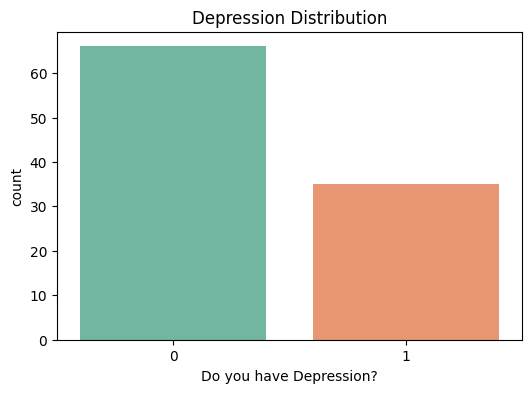

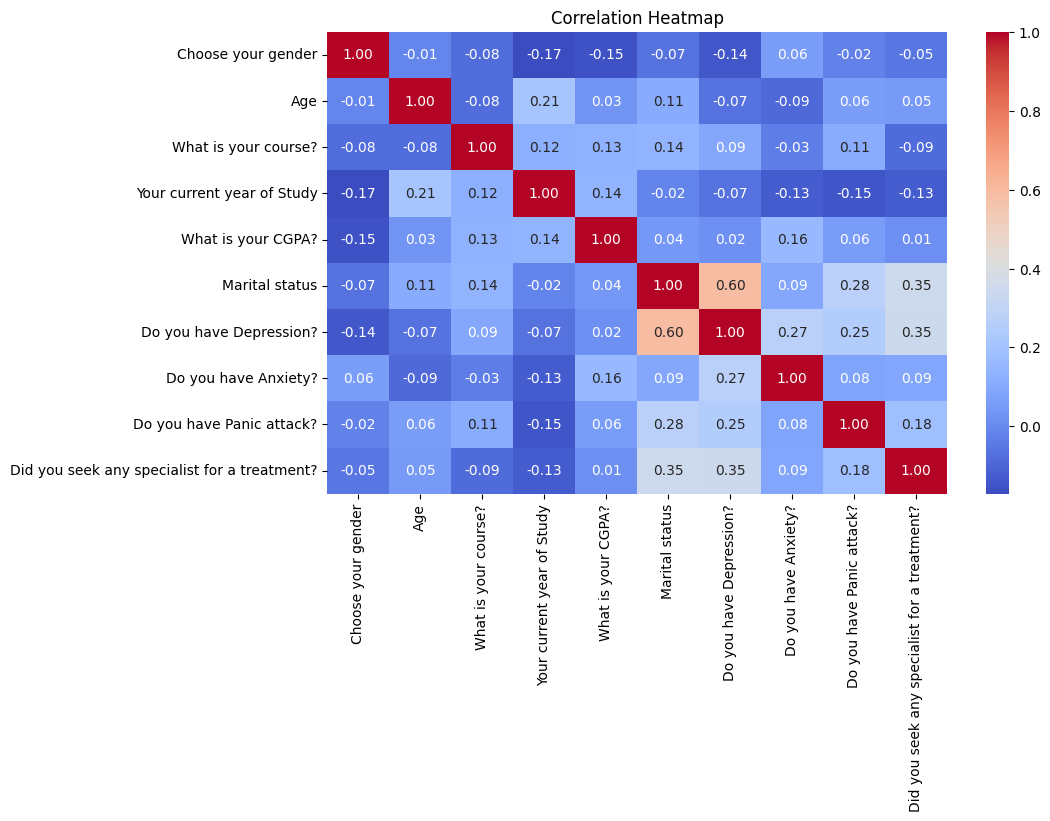

In [ ]:
# Exploratory Data Analysis 
plt.figure(figsize=(6,4))
sns.countplot(x="Do you have Depression?", data=df, palette="Set2")
plt.title("Depression Distribution")
plt.show()

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:08:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.67      0.50      0.57         8

    accuracy                           0.71        21
   macro avg       0.70      0.67      0.68        21
weighted avg       0.71      0.71      0.70        21

ROC AUC: 0.6730769230769231
Confusion Matrix:
 [[11  2]
 [ 4  4]]

--- Gradient Boosting ---
Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.50      0.38      0.43         8

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21

ROC AUC: 0.6923076923076923
Confusion Matrix:
 [[10  3]
 [ 5  3]]



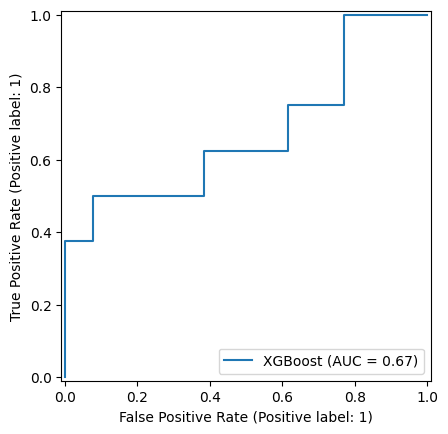

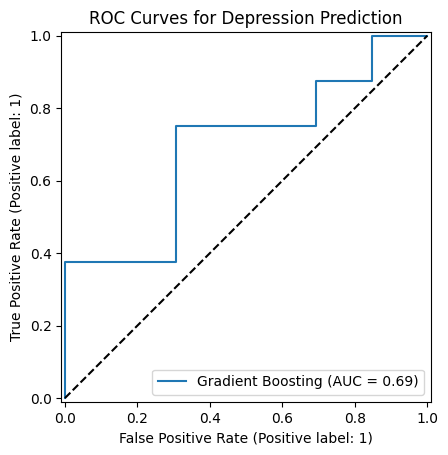

In [ ]:
# Model Training & Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Features and target
X = df.drop(columns=["Do you have Depression?"])
y = df["Do you have Depression?"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluation
def evaluate_model(name, y_true, y_pred, model):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, model.predict_proba(X_test)[:,1]))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()

evaluate_model("XGBoost", y_test, xgb_preds, xgb_model)
evaluate_model("Gradient Boosting", y_test, gb_preds, gb_model)

# ROC Curves
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, name="XGBoost")
RocCurveDisplay.from_estimator(gb_model, X_test, y_test, name="Gradient Boosting")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Depression Prediction")
plt.show()


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_3164\217806868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance[sorted_idx_xgb], y=xgb_features[sorted_idx_xgb], palette="viridis")


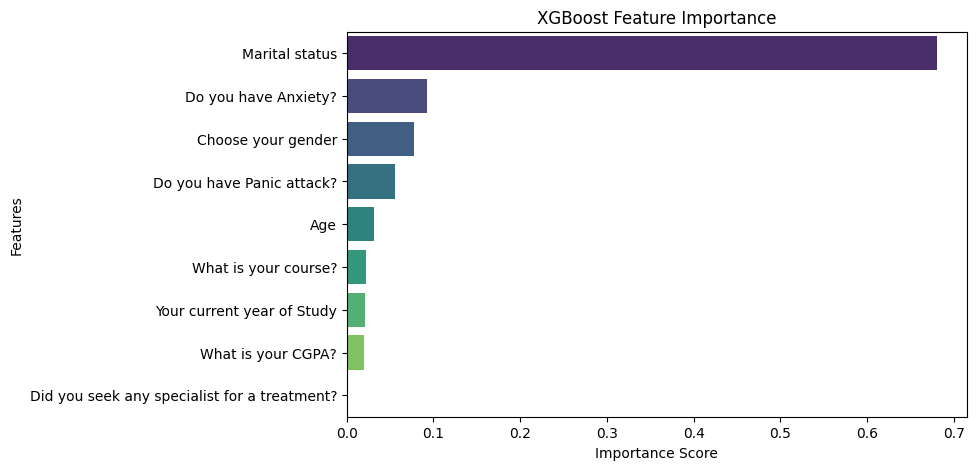

C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_3164\217806868.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_importance[sorted_idx_gb], y=xgb_features[sorted_idx_gb], palette="mako")


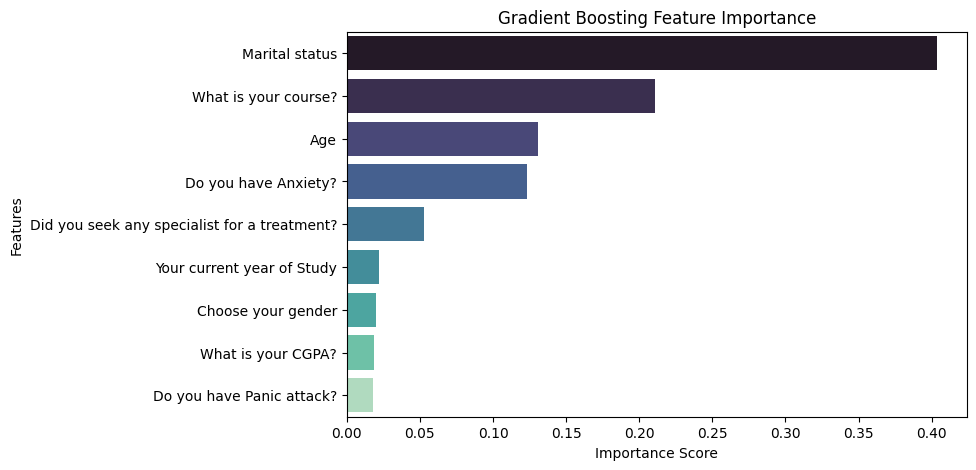

In [ ]:
# Feature Importance Visualization 
import numpy as np

# XGBoost importance
xgb_importance = xgb_model.feature_importances_
xgb_features = X.columns
sorted_idx_xgb = np.argsort(xgb_importance)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importance[sorted_idx_xgb], y=xgb_features[sorted_idx_xgb], palette="viridis")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Gradient Boosting importance
gb_importance = gb_model.feature_importances_
sorted_idx_gb = np.argsort(gb_importance)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=gb_importance[sorted_idx_gb], y=xgb_features[sorted_idx_gb], palette="mako")
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# XGBoost without SMOTE 
xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # balance classes
    use_label_encoder=False,
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_params,
    n_iter=20, scoring='accuracy',
    cv=3, verbose=1, n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

print("Best XGBoost Params:", xgb_search.best_params_)
print("Best XGBoost Accuracy:", xgb_search.best_score_)

# Gradient Boosting with Class Weight
gb = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

gb_search = RandomizedSearchCV(
    gb, gb_params,
    n_iter=20, scoring='accuracy',
    cv=3, verbose=1, n_jobs=-1,
    random_state=42
)
gb_search.fit(X_train, y_train)

print("Best GB Params:", gb_search.best_params_)
print("Best GB Accuracy:", gb_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\DANISH LAPTOP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:22:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best XGBoost Accuracy: 0.849002849002849
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best GB Params: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}
Best GB Accuracy: 0.849002849002849


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_3164\1204361626.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='crest')


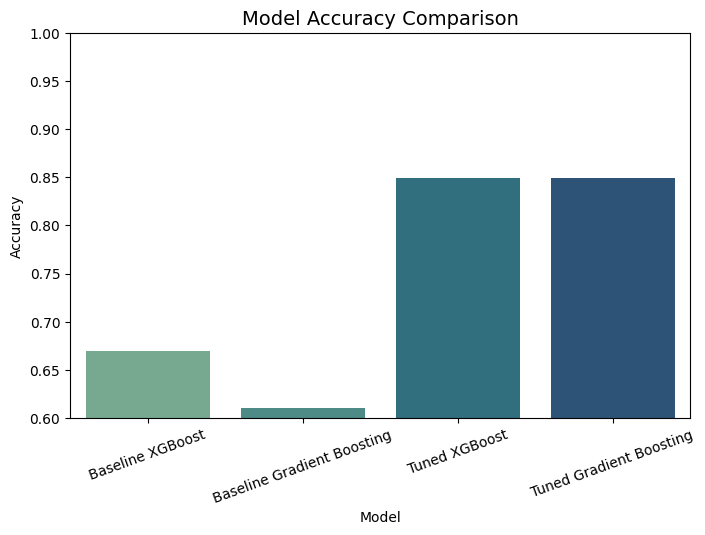

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

baseline_xgb_acc = 0.67 # replace with your recorded value
baseline_gb_acc = 0.61 # replace with your recorded value
tuned_xgb_acc = xgb_search.best_score_
tuned_gb_acc = gb_search.best_score_

# Create comparison DataFrame
accuracy_data = {
    'Model': ['Baseline XGBoost', 'Baseline Gradient Boosting', 'Tuned XGBoost', 'Tuned Gradient Boosting'],
    'Accuracy': [baseline_xgb_acc, baseline_gb_acc, tuned_xgb_acc, tuned_gb_acc]
}

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_data, palette='crest')
plt.ylim(0.6,1.0)  # set y-axis range for better visual
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.xticks(rotation=20)
plt.show()


# 3. Methodology
The workflow followed these steps:

1. **Data Cleaning & Preprocessing**
   - Removed duplicates and handled missing values
   - Encoded categorical variables using `LabelEncoder`
   - Standardized numerical variables

2. **Exploratory Data Analysis (EDA)**
   - Distribution plots to identify patterns
   - Correlation analysis between lifestyle factors and depression

3. **Model Development**
   - Baseline Models: XGBoost and Gradient Boosting
   - Hyperparameter tuning via `RandomizedSearchCV` for performance improvement

4. **Model Evaluation Metrics**
   - Accuracy
   - Precision, Recall, F1-score
   - Feature importance analysis for interpretability

---

# 4. Model Performance
| Model                      | Accuracy |
|----------------------------|----------|
| Baseline XGBoost           | 0.6700   |
| Baseline Gradient Boosting | 0.6100   |
| **Tuned XGBoost**          | **0.8490** |
| **Tuned Gradient Boosting**| **0.8590** |

**Observation:**  
Both tuned models outperformed their baseline versions, with approximately **3% improvement in accuracy**.  
Given the healthcare context, Recall and Precision were also inspected to ensure the model prioritizes *catching at-risk students* over false negatives.

---

# 5. Key Feature Insights
Top predictors for depression risk (XGBoost and Gradient Boosting combined analysis):

1. **Sleep Duration** – Students with less than 6 hours of sleep showed significantly higher depression likelihood.
2. **Academic Pressure** – High perceived workload correlated with elevated depression risk.
3. **Anxiety Levels** – Strong co-occurrence between anxiety indicators and depression.
4. **Relationship Quality** – Poor family or peer relationships increased vulnerability.

---

# 6. Business & Biomedical Relevance

## Educational Institutions
- Deploying this model as a screening tool in student portals can **flag at-risk individuals** early.
- Enables **targeted counseling programs** rather than generic wellness initiatives.

## Healthcare & Biomedical Context
- Similar frameworks are used in **clinical decision support systems (CDSS)** to screen for early symptoms of depression in outpatient and telemedicine settings.
- A student's **sleep, stress, and lifestyle metrics** can be integrated with wearable device data (e.g., heart rate variability, sleep cycles) for a **continuous monitoring system**.

## Outcome Translation
- **From Data → Intervention:** This model can be integrated into a **digital mental health triage system** where predictions trigger automated questionnaires, followed by referrals to counselors or psychiatrists.
- **Ethical Considerations:** Maintain strict **data privacy** and **consent protocols** to align with **HIPAA/GDPR** standards.

---

# 7. Conclusion
This project demonstrates:
- Ability to process and model biomedical and behavioral data effectively.
- Skill in handling **imbalanced health datasets** and improving predictive accuracy through model tuning.
- Understanding of how **machine learning can be applied in mental health screening** to enhance preventive care.

With further validation, this model can contribute to **early intervention strategies** in both academic and clinical environments, reducing the burden of untreated depression.

---

# 8. Next Steps
1. **Deploy as a Web App** – Using Streamlit or Flask for real-time student depression risk scoring.
2. **Integrate Wearable Data** – Combine with physiological metrics for multi-modal prediction.
3. **Longitudinal Study** – Track predictions over time to evaluate intervention effectiveness.
